In [29]:
# INICIALIZAÇÃO DOS DATASETS

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np  # numpy: numerical analysis
docentesRaw  = pd.read_csv('C:/Users/Sam/Downloads/t1ds/2018-05-02/docentes.csv')
discentesRaw = pd.read_csv('C:/Users/Sam/Downloads/t1ds/2018-05-02/discentes.csv')
producaoRaw  = pd.read_csv('C:/Users/Sam/Downloads/t1ds/2018-05-02/producao.csv')
trabalhosRaw = pd.read_csv('C:/Users/Sam/Downloads/t1ds/2018-05-02/trabalhos.csv')
docentes  = docentesRaw
discentes = discentesRaw
producao  = producaoRaw 
trabalhos = trabalhosRaw
#docentes.head()

In [30]:
# 1) Quantos professores (docentes) havia em cada programa em 2017, 
# em cada quadro (permanente, colaborador, visitante)? 

docentes_copy = docentes 
# é necessario mudar pra fazer o inner join
docentes_copy.columns = ['categoria', 'ies', 'orientador', 'prof_id']
dd = pd.merge(docentes_copy, discentes, how='inner', on='orientador')
# agora é necessário remover tuplas com 'Orientador' duplicado
dd_1_ndupl = dd.drop_duplicates(subset='orientador')
dd_1 = dd_1_ndupl.groupby(['programa', 'categoria']).size()
display(dd_1)

programa                                                          categoria  
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                              COLABORADOR     4
                                                                  PERMANENTE     34
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                              COLABORADOR     6
                                                                  PERMANENTE     41
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                              PERMANENTE     23
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)  COLABORADOR     6
                                                                  PERMANENTE     63
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                             COLABORADOR    14
                                                                  PERMANENTE     68
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                             COLABORADOR     5
                                                                  PERMANENTE     4

programa
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                244
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                352
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                228
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    492
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               716
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               463
COMPUTAÇÃO(31003010046P4)                                           282
COMPUTAÇÃO(42001013004P4)                                           319
INFORMÁTICA(31001017110P8)                                          173
INFORMÁTICA(31005012004P9)                                          217
dtype: int64

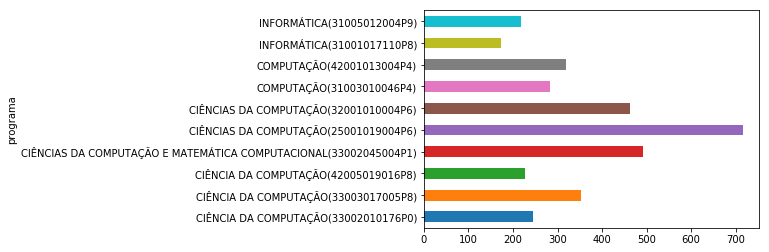

In [31]:
# 2) Quantos alunos (discentes) de Mestrado/Doutorado 
# havia em cada programa em 2017?
discente_aux = discentes.loc[discentes['nivel'] != 'Graduação', discentes.columns]
discentes_programa = discente_aux.groupby('programa').size()
display(discentes_programa)
# Mudar o plot (?)
discentes_programa.plot(kind='barh', stacked=False)

In [32]:
# 3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor 
# do quadro permanente em cada programa em 2017?
import numpy as np
# filtra apenas os permanentes
dd_aux = dd.loc[dd['categoria'] == 'PERMANENTE', dd.columns]
# filtra apenas os alunos de Mestrado/Doutorado
dd_aux2 = dd_aux.loc[dd_aux['nivel'] != 'Graduação', ['orientador', 'programa']]
dd_orientador = dd_aux.groupby(['orientador', 'programa']).size()
#display(dd_orientador)

total = np.sum(dd_orientador.sum())
#print(total)
dd_orientador_percent = 100.* dd_orientador / total
dd_orientador_percent

orientador                          programa                                                        
ABEL GUILHERMINO DA SILVA FILHO     CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               0.410742
ADENILSO DA SILVA SIMAO             CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    0.221169
ADRIANA SANTAROSA VIVACQUA          INFORMÁTICA(31001017110P8)                                          0.252765
ADRIANO ALONSO VELOSO               CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               0.410742
ADRIANO CESAR MACHADO PEREIRA       CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               0.315956
ADRIANO LORENA INACIO DE OLIVEIRA   CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               0.442338
AFONSO PAIVA NETO                   CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    0.347551
AGMA JUCI MACHADO TRAINA            CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    0.25

In [61]:
# 5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

# precisa filtrar os nulos (verificar nas outras questões também se é necessário)
trabalhos = trabalhos[trabalhos.abstract.isnull() == False]
trabalhos = trabalhos[trabalhos.area != '-']
trabalhos.shape

(590, 20)

In [65]:
# 6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

# Fazer gráfico (?)
#trabalhos.tipo.unique()
#trabalhos.area.unique()
# Precisa fazer groupby por programa também (?)
trabalhos_areas = trabalhos.groupby(['programa','area']).size()
display(trabalhos_areas)

programa                                                           area                                              
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                              CIÊNCIA DA COMPUTAÇÃO                                 52
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                              ENGENHARIA DA INFORMAÇÃO                              22
                                                                   SISTEMAS DE COMPUTAÇÃO                                14
                                                                   TEORIA DA COMPUTAÇÃO                                   4
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                              CIÊNCIA DA COMPUTAÇÃO                                 44
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                             ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS        3
                                                                   BANCO DE DADOS                                         8
              

In [91]:
# 7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

trabalhos.data_defesa = pd.to_datetime(trabalhos.data_defesa)
# Necessário ordenar por data para possuir uma distribuição correta ao longo do tempo
trabalhos_sort = trabalhos.sort_values(by='data_defesa')
trabalhos_sort.head()
#trabalhos_sort.describe()

tsJan = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-01-01') & (trabalhos_sort['data_defesa'] <= '2017-02-01')]
tsFev = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-02-01') & (trabalhos_sort['data_defesa'] <= '2017-03-01')]
tsMar = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-03-01') & (trabalhos_sort['data_defesa'] <= '2017-04-01')]
tsAbr = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-04-01') & (trabalhos_sort['data_defesa'] <= '2017-05-01')]
tsMai = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-05-01') & (trabalhos_sort['data_defesa'] <= '2017-06-01')]
tsJun = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-06-01') & (trabalhos_sort['data_defesa'] <= '2017-07-01')]
tsJul = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-07-01') & (trabalhos_sort['data_defesa'] <= '2017-08-01')]
tsAgo = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-08-01') & (trabalhos_sort['data_defesa'] <= '2017-09-01')]
tsSet = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-09-01') & (trabalhos_sort['data_defesa'] <= '2017-10-01')]
tsOut = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-10-01') & (trabalhos_sort['data_defesa'] <= '2017-11-01')]
tsNov = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-11-01') & (trabalhos_sort['data_defesa'] <= '2017-12-01')]
tsDez = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-12-01') & (trabalhos_sort['data_defesa'] <= '2018-01-01')]

# fazer plot meses x quantidade

(98, 20)

In [143]:
# 8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

# muda coluna nome para autor para inner join, discente_aux já removeu 'Graduação'
discente_aux.rename(columns={'nome':'autor'}, inplace=True)
dt = pd.merge(discente_aux, trabalhos_sort, how='inner', on='autor')
discentes.shape # discentes = 4049 rows (total de discentes)
dt.shape        # dt = 680 rows (total que defendeu em todos os programas)

dt_programa = dt.groupby('programa_y').size()
dt_programa/4049*100

programa_y
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                1.407755
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.284268
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.210175
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               3.457644
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               2.420351
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.877007
COMPUTAÇÃO (31003010046P4)                                           1.457150
COMPUTAÇÃO (42001013004P4)                                           1.926402
INFORMÁTICA (31001017110P8)                                          0.691529
INFORMÁTICA (31005012004P9)                                          1.061991
dtype: float64

In [164]:
# 9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?
producao.head()
types = ['ARTIGO EM PERIÓDICO', 'TRABALHO EM ANAIS']
producao_pa = producao[producao.subtipo.isin(types)]
producao_pa_prog = producao_pa.groupby('programa').size()
display(producao_pa_prog)

programa
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                156
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                240
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                183
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               309
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               316
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    370
COMPUTAÇÃO (31003010046P4)                                           193
COMPUTAÇÃO (42001013004P4)                                           229
INFORMÁTICA (31001017110P8)                                          122
INFORMÁTICA (31005012004P9)                                          137
dtype: int64

In [170]:
# 10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?
#"por número de docentes permanentes de cada programa em 2017?"
producao_pa['dict_paper_autores'][3]

"[{'nome': 'FREDERICO GALAXE PAES', 'categoria': 'Participante Externo', 'ordem': '1'}, {'nome': 'ARTUR ALVES PESSOA', 'categoria': 'Participante Externo', 'ordem': '2'}, {'nome': 'THIBAUT VICTOR GASTON VIDAL', 'categoria': 'Docente', 'ordem': '3'}]"

In [ ]:
# 11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?
